# Marketing Campagin Data
## Uplift Modeling Technique use case

### Libraries and Imports

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import yaml

In [16]:
base_path = os.path.dirname(os.getcwd())
print(base_path)
data_path = os.path.join(base_path,"data")
config_path = os.path.join(base_path,"config")

/Users/satwikboina/Documents/datascience/kaggle_projects/Projects/marketing_campaign_analysis


In [17]:
def load_config(config_path):
    """
    Load configuration from a YAML file.
    
    Args:
        config_path (str): Path to the YAML configuration file.
        
    Returns:
        dict: Configuration parameters as a dictionary.
    """
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
    return config

config= load_config(os.path.join(config_path, "config.yaml"))
config

{'filename': 'data.csv'}

In [19]:
df = pd.read_csv(os.path.join(data_path,"input",str(config['filename'])))
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


## EDA

#### About Dataset
- recency : Months took to buy the product since the last purchase
- history : sum of purchases 
- used_discount : flag about discount usage before
- is_referral : flag about being referred before
- offer : offers sent to the customer
- used_bogo : flag about using buy one get one before


#### Questions to ask?
- which is the most used channel per zip_code?
- Compare the conversion rates for possible scenarios.
- What is the conversion rate when a discount or a bogo or a referral is used?
- What is the recency when someone used_bogo?

In [24]:
df.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

recency          0
history          0
used_discount    0
used_bogo        0
zip_code         0
is_referral      0
channel          0
offer            0
conversion       0
dtype: int64

#### Conversion Rates

In [ ]:
conversion_df = df.copy()
conversion_df['conversion'] = conversion_df['conversion'].map({1:"converted",0:'resistant'})
conversion_df['perks'] = np.logical_or(conversion_df['used_discount'],conversion_df['used_bogo'],conversion_df['is_referral'])
print("Percentage of people who have used perks :",conversion_df['perks'].sum()*100/conversion_df.shape[0])

# Every person either availed the discount offer or bogo offer or referral historically

Percentage of people who have used perks : 100.0


/var/folders/vd/729qptzn30x2hvptqg5739dr0000gn/T/ipykernel_1480/1872381894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_df['perks'] = np.logical_or(conversion_df['used_discount'],conversion_df['used_bogo'],conversion_df['is_referral'])
/var/folders/vd/729qptzn30x2hvptqg5739dr0000gn/T/ipykernel_1480/1872381894.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ True  True  True ...  True  True  True]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  conversion_df['perks'] = np.logical_or(conversion_df['used_discount'],conversion_df['used_bogo'],conversion_df['is_referral'])


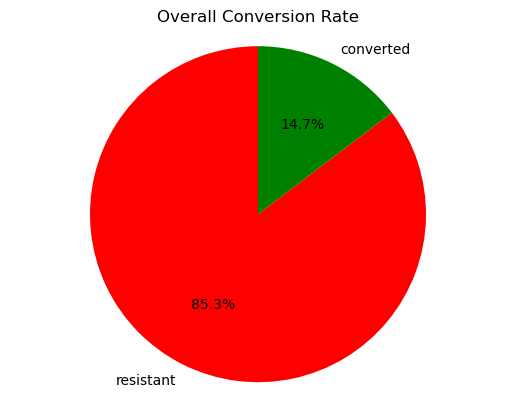

In [49]:
overall = conversion_df['conversion'].value_counts().reset_index()
plt.pie(overall['count'], labels=overall['conversion'], autopct='%1.1f%%', startangle=90, colors=['r','g'])
plt.title('Overall Conversion Rate')
plt.axis('equal')
plt.show()

# overall level of conversion rate
# presence of class imbalance in the dependent variable.

In [53]:
zip_codes = conversion_df.groupby(['zip_code'])['conversion'].value_counts().reset_index()
channels_conversion = conversion_df.groupby(['channel'])['conversion'].value_counts().reset_index()
channels_conversion

,channel,conversion,count
0,Multichannel,resistant,6429
1,Multichannel,converted,1333
2,Phone,resistant,24458
3,Phone,converted,3563
4,Web,resistant,23719
5,Web,converted,4498


In [57]:
zip_codes

,zip_code,conversion,count
0,Rural,resistant,7764
1,Rural,converted,1799
2,Surburban,resistant,24749
3,Surburban,converted,4027
4,Urban,resistant,22093
5,Urban,converted,3568


In [28]:
df.groupby(['zip_code','channel'])["history"].sum()

zip_code   channel     
Rural      Multichannel     591906.14
           Phone            871014.13
           Web              859491.91
Surburban  Multichannel    1806853.96
           Phone           2511868.82
           Web             2601585.96
Urban      Multichannel    1645011.91
           Phone           2299977.16
           Web             2305771.98
Name: history, dtype: float64

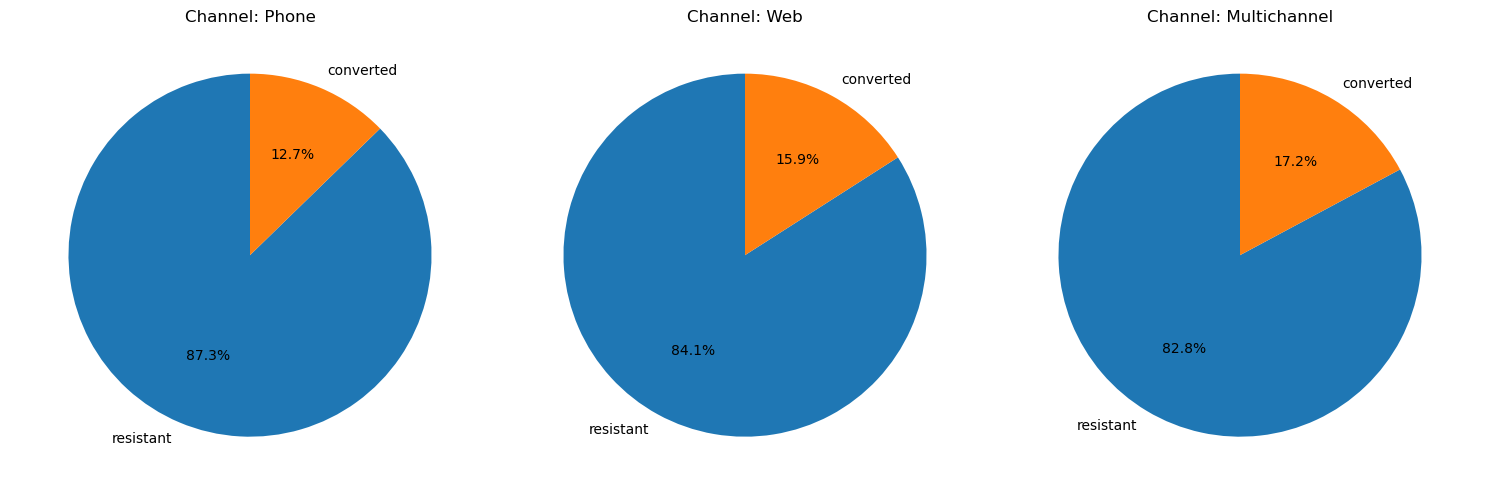

In [54]:
channels = conversion_df['channel'].unique()
fig, axs = plt.subplots(1, len(channels), figsize=(5 * len(channels), 5))

for i, channel in enumerate(channels):
    channel_data = channels_conversion[channels_conversion['channel'] == channel]
    axs[i].pie(channel_data['count'],
               labels=channel_data['conversion'],
               autopct='%1.1f%%',
               startangle=90)
    axs[i].set_title(f'Channel: {channel}')
    axs[i].axis('equal')

plt.tight_layout()
plt.show()


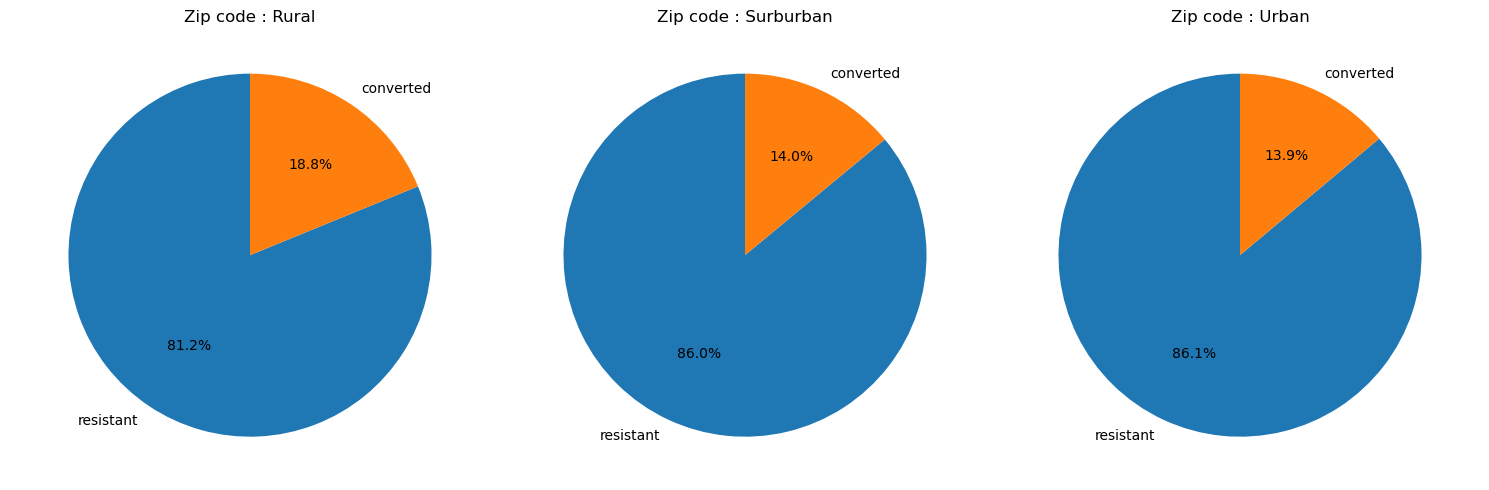

In [58]:
zips = zip_codes['zip_code'].unique()
fig, axs = plt.subplots(1, len(zips), figsize=(5 * len(zips), 5))

for i, zip in enumerate(zips):
    zip_data = zip_codes[zip_codes['zip_code'] == zip]
    axs[i].pie(zip_data['count'],
               labels=zip_data['conversion'],
               autopct='%1.1f%%',
               startangle=90)
    axs[i].set_title(f'Zip code : {zip}')
    axs[i].axis('equal')

plt.tight_layout()
plt.show()


Index(['used_discount', 'conversion', 'count'], dtype='object')
[0 1]
Index(['is_referral', 'conversion', 'count'], dtype='object')
[ True]


TypeError: 'Axes' object is not subscriptable

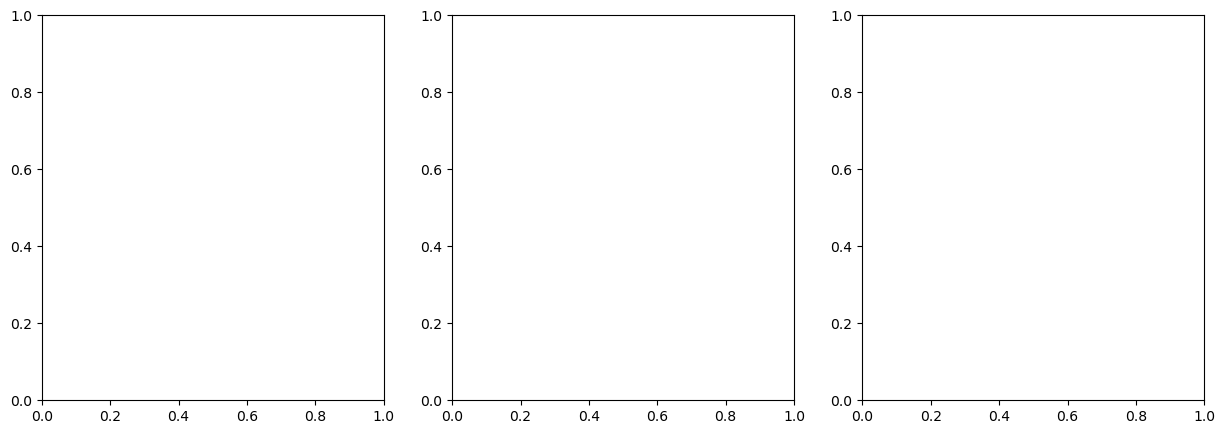

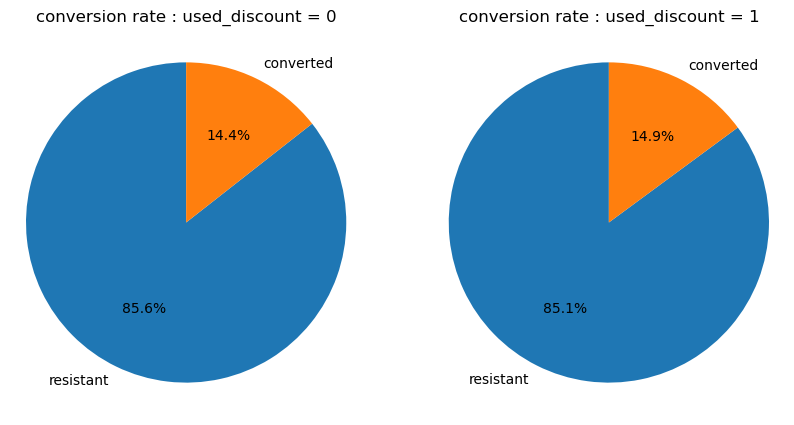

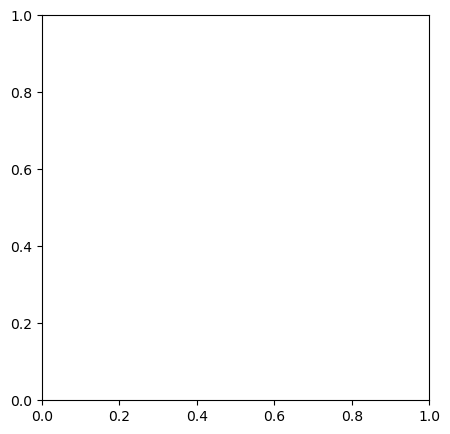

In [83]:
fig,axes = plt.subplots(1,3,figsize = (15,5))
for i,col in enumerate(['used_discount','is_referral',"used_bogo"]):
    temp = conversion_df.groupby(col)['conversion'].value_counts().reset_index()
    print(temp.columns)
    
    temps = temp[col].unique()
    print(temps)
    fig, axs = plt.subplots(1, len(temps), figsize=(5 * len(temps), 5))
    #plt.title(f"{col}")
    for i, val in enumerate(temps):
        temp_data = temp[temp[col] == val]
        axs[i].pie(temp_data['count'],
                labels=temp_data['conversion'],
                autopct='%1.1f%%',
                startangle=90)
        axs[i].set_title(f'conversion rate : {col} = {val}')
        axs[i].axis('equal')

plt.tight_layout()
plt.show()

In [84]:
temp

,is_referral,conversion,count
0,True,resistant,54606
1,True,converted,9394
